# Лабораторная работа №6. Многоскоростная обработка сигналов.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ

#  Модуль 1. Интерполяция сигналов.

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
def dtft(x, M=2048):
    """
    Функция вычисляет значения ДВПФ в M точках на отрезке 
    по оси нормированных частот [-0.5; 0.5]

    Parameters
    ----------
    x : complex
        входная последовательность отсчетов, первый отсчет при k=0
    M : int
        колличество точек на отрезке [-0.5; 0.5]

    Returns
    -------
    float
        значения оси нормированных частот, 
        соотвествующих вычисленным значениям
        спектральной функции  
    complex
        значения спектральной функции      
    """
    return (np.fft.fftshift(np.fft.fftfreq(M, d=1)), np.fft.fftshift(np.fft.fft(x, M)))

In [2]:
%matplotlib notebook

In [3]:
%matplotlib inline

## Интерполяция сигналов с ограниченной спектральной  полосой  с помощью  ДПФ


Задача состоит в нахождении значений точек между уже известными точками функции с ограниченной полосой. Аналоговая функция, дискретизованная с шагом $\Delta t<1/2{{f}_\text{в}}\text{,}$ точно задаётся интерполяционным рядом Котельникова:
$$x(t)=\sum\limits_{k\,=\,-\infty }^{\infty }{x(k\Delta t)\cdot }\frac{\sin 2\pi {{f}_\text{в}}(t-k\Delta t)}{2\pi {{f}_\text{в}}(t-k\Delta t)}.$$

Предположим теперь, что известно только $N$ точек функции ($N$ - четное число). Функция, которая равна нулю вне интервала от 0 до $N\Delta t,$ не может быть ограниченной по полосе. Следовательно, строгая интерполяция рядом Котельникова в этом общем случае невозможна. 

Поэтому допустим, что известные $N$ точек представляют один период **периодической**, ограниченной по полосе действительной функции. Коэффициенты ДПФ $\tilde{X}[n]$ этой последовательности симметрично расположены на интервале $N$ в соответствии со свойствами симметрии ДПФ. Поместим $(L-1)N$ нулей в середину последовательности $\tilde{X}[n].$ Обратное преобразование будет иметь $LN$ точек на одном периоде. Прямое и обратное ДПФ могут быть вычислены с помощью алгоритма быстрого преобразования Фурье – БПФ. 


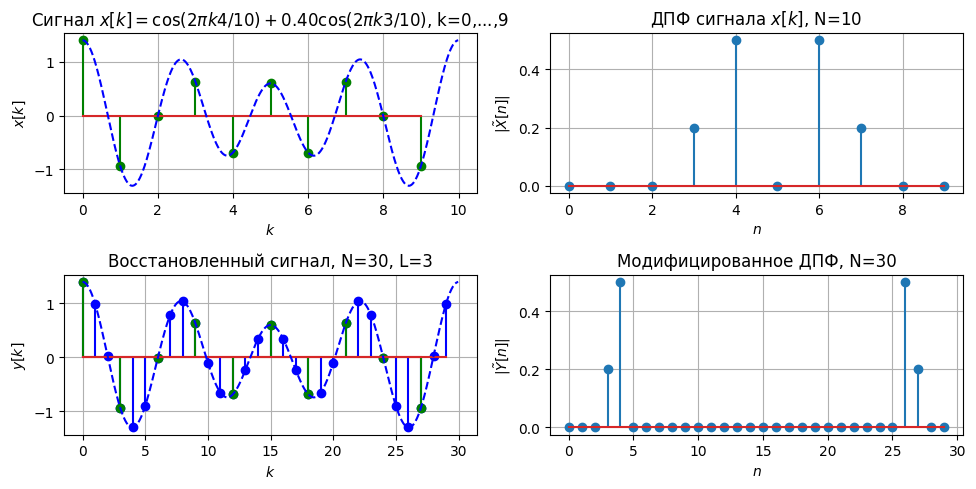

In [4]:
N=10
x=np.ones(N)
n_0=4
n_1=3
A=0.4
L=3

k = np.arange(N)
x = np.cos(2*np.pi*n_0*k/N)+A*np.cos(2*np.pi*n_1*k/N)

Q=1024
k1=np.arange(Q)
q = np.cos(2*np.pi*n_0*k1/Q)+A*np.cos(2*np.pi*n_1*k1/Q)

plt.figure(figsize=[10, 5], dpi=100)
plt.subplot(2,2,1)
plt.stem(np.arange(x.size), x, 'g', markerfmt='go', use_line_collection=True)
plt.plot(N*np.arange(q.size)/Q, q, 'b--')
plt.title(u'Сигнал $x[k]=\cos(2\\pi k %i/%i)+%.2f\cos(2\\pi k %i/%i)$, k=0,...,%i' 
          %(n_0, N, A, n_1, N, (N-1)))
plt.xlabel(u'$k$')
plt.ylabel(u'$x[k]$')
plt.grid()

Xn=np.fft.fft(x, N)/N
plt.subplot(2,2,2)
plt.stem(np.arange(N), abs(Xn), use_line_collection=True)
plt.title(u'ДПФ сигнала $x[k]$, N=%i' %N);
plt.xlabel(u'$n$');
plt.ylabel(u'$|\\tilde{X}[n]|$');
plt.grid()

if (N%2)==0:
    Yn=np.hstack((Xn[0:(N//2)], Xn[N//2]/2, np.zeros((L-1)*N-1), 
                     Xn[N//2]/2, Xn[(N//2+1):N]))    
#if (N%2)!=0:
#    add code
    
plt.subplot(2,2,4)
plt.stem(np.arange(Yn.size), abs(Yn), use_line_collection=True)
plt.title(u'Модифицированное ДПФ, N=%i' %(Yn.size));
plt.xlabel(u'$n$');
plt.ylabel(u'$|\\tilde{Y}[n]|$');
plt.grid()

x2=np.fft.ifft(Yn)*L*N
plt.subplot(2,2,3)
plt.stem(np.arange(x2.size), x2.real,'b', markerfmt='bo', use_line_collection=True)
plt.stem(Yn.size*np.arange(x.size)/N, x, 'g', markerfmt='go', use_line_collection=True)
plt.plot(L*N*np.arange(q.size)/Q, q, 'b--')
plt.title(u'Восстановленный сигнал, N=%i, L=%i' %(Yn.size, L))
plt.xlabel(u'$k$')
plt.ylabel(u'$y[k]$')
plt.grid()
plt.tight_layout()

#plt.savefig('fft_iterpolation_1.eps', format = 'eps', bbox_inches='tight')
plt.show()

Если исходный сигнал $x(t)=\cos\left(2\pi  \dfrac{4}{10} f_\text{д}  t \right)+0,4\cos\left(2\pi  \dfrac{3}{10} f_\text{д} t \right)$, то востановление точное:
* Спектр сигнала $x(t)$
$$X(f) = 0,5 \delta\left(f-\dfrac{4}{10} f_\text{д}\right)+0,5 \delta\left(f+\dfrac{4}{10} f_\text{д}\right)+0,2 \delta\left(f-\dfrac{3}{10} f_\text{д}\right)+0,2 \delta\left(f+\dfrac{3}{10} f_\text{д}\right).$$
* при дискретизации с шагом $\Delta t_1 = 1/ f_\text{д}$ получаем последовательность $$x[k]=\cos\left(2\pi  \dfrac{4}{10} k \right)+0,4\cos\left(2\pi  \dfrac{3}{10} k  \right).$$
Ее ДВПФ
$$X(\nu) = \sum_{m=-\infty}^{\infty} 0,5 \delta\left(\nu-\dfrac{4}{10} +m\right)+0,5 \delta\left(\nu-\dfrac{4}{10} -m\right)+0,2 \delta\left(\nu-\dfrac{3}{10} +m\right)+0,2 \delta\left(\nu-\dfrac{3}{10} -m\right).$$
ДПФ размерности $N_\text{FFT}=10$:
$$\tilde{X}[n]=\left\{ \begin{matrix}
   0,5, \; n=\pm 4 + 10m,  \;m\in Z;  \\
   0,2, \; n=\pm 3 + 10m,  \;m\in Z;  \\
   0, \; \text{при других } \;n. 
\end{matrix} \right.
$$


* при дискретизации с шагом $\Delta t_2 = 1/ (3f_\text{д})$ получаем последовательность $$y[k]=\cos\left(2\pi  \dfrac{4}{30} k \right)+0.4\cos\left(2\pi  \dfrac{3}{30} k  \right).$$
Ее ДВПФ
$$Y(\nu) = \sum_{m=-\infty}^{\infty} 0,5 \delta\left(\nu-\dfrac{4}{30} +m\right)+0,5 \delta\left(\nu-\dfrac{4}{30} -m\right)+0,2 \delta\left(\nu-\dfrac{3}{30} +m\right)+0,2 \delta\left(\nu-\dfrac{3}{30} -m\right).$$
ДПФ размерности $N_\text{FFT}=30$:
$$\tilde{Y}[n]=\left\{ \begin{matrix}
   0,5, \; n=\pm 4 + 30m,  \;m\in Z;  \\
   0,2, \; n=\pm 3 + 30m,  \;m\in Z;  \\
   0, \; \text{при других } \;n. 
\end{matrix} \right.
$$

Ограничения подхода:

* Требование о дискретизации периодического сигнала $x(t)$ строго по периоду.
* Спектр $x(t)$ должен лежать строго в полосе $(-f\text{д}/2; f\text{д}/2)$. 

## Система однократной интерполяции.

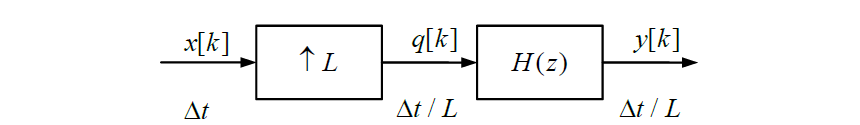

Входной сигнал $x[k]$ поступает на блок $\uparrow \ L$(экспандер), который формирует сигнал $q[k]$ с частотой дискретизации ${\tilde{f_{s}}}=L/\Delta t$:
	$$q[k]=\left\{ \begin{matrix}
   x[k/L],\ k=Lm,\ m\in Z;  \\
   0,\ k\ne Lm,\ m\in Z.  \\
\end{matrix} \right.$$                                   	
Построение последовательности $q[k]$ эквивалентно добавлению $L-1$ нуля между каждой парой отсчетов $x[k]$. Затем сигнал $q[k]$ поступает на цифровой фильтр нижних частот с передаточной функцией $H(z)$. Его АЧХ в идеальном случае на основном периоде определяется как
	$$\left| {H_{\text{ид}}{(\tilde{\nu})}} \right|=\left\{ \begin{matrix}
   L,\ \ \left| {\tilde{\nu }} \right|\le \frac{1}{2L};  \\
   0,\ \text{ }\ \tilde{\nu }\in [-0.5,\ 0.5].  \\
\end{matrix} \right.$$                	
$\tilde{\nu }$— частота, нормированная на величину ${\tilde{f_{s}}}=L/\Delta t$. В результате получается последовательность $y[k]$, которая является результатом интерполяции сигнала $x[k]$. Усиление фильтра $L$ в полосе пропускания  необходимо для того, чтобы обеспечить соответствие амплитуд в $x[k]$ и $q[k]$, поскольку длина последовательности $q[k]$ больше $x[k]$ $L$раз. 


### Функция scipy.signal.upfirdn

```scipy.signal.upfirdn(h, x, up=1, down=1, axis=- 1, mode='constant', cval=0)```

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.upfirdn.html

Upsample, FIR filter, and downsample.

**Parameters**

* ```h```  *array_like* 1-D FIR (finite-impulse response) filter coefficients.
* ```x```  *array_like*  Input signal array.
* ```up```  *int, optional* Upsampling rate. Default is 1.
* ```down```  *int, optional* Downsampling rate. Default is 1.

**Returns**
* ```y``` *ndarray* The output signal array. Dimensions will be the same as x except for along axis, which will change size according to the h, up, and down parameters.


Функция используется для расчета работы системы однократной передискретизации. Если ```down=1``` (значение по умолчанию), то она моделирует систему однократной интерполяции с целым коэффицентом. 

In [5]:
N=20
k=np.arange(N)
x=0.4*np.cos(2*np.pi*k*0.18)
L=4

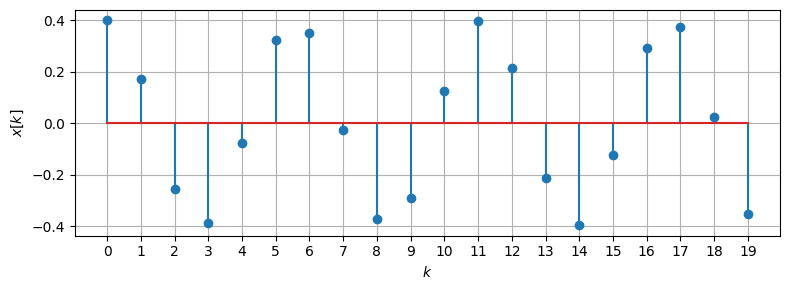

In [6]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xlabel("$k$")
plt.ylabel('$x[k]$')
plt.xticks(np.arange(x.size))
plt.tight_layout()
plt.grid()

Чтобы вывести промежуточный сигнал $q[k]$, зададим фильтр частотной характеристикой $H(\nu)=1$ (импульсной характеристикой $h[k]=\mathbf{1}[k]$).

In [7]:
q=signal.upfirdn([1], x, up=L)   # FIR filter

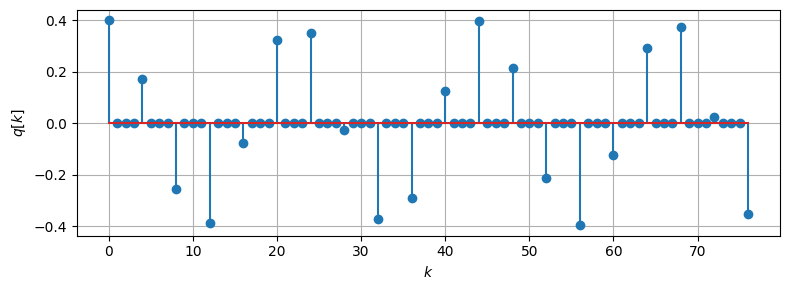

In [8]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(q.size), q)
plt.xlabel("$k$")
plt.ylabel('$q[k]$')
plt.tight_layout()
plt.grid()

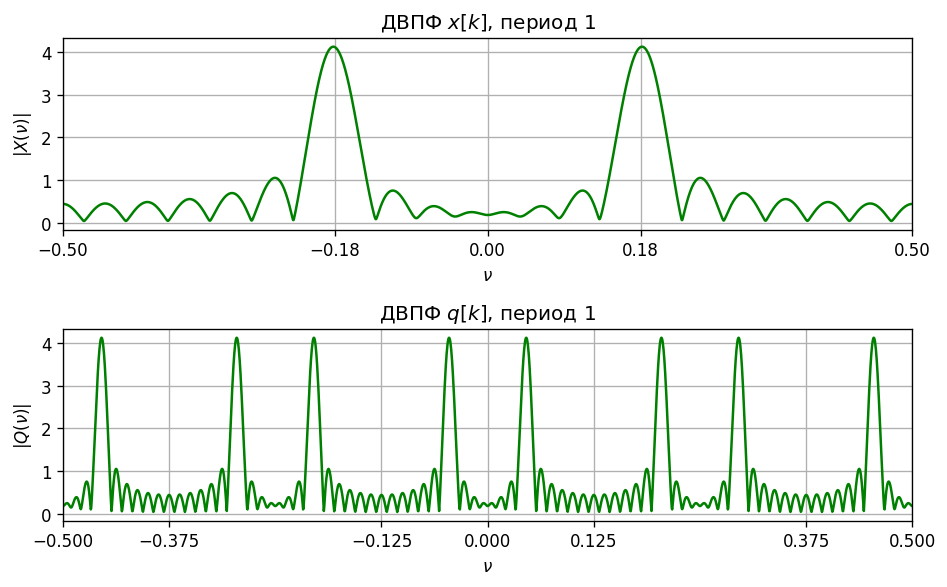

In [9]:
nu1, Xn = dtft(x)
nu2, Q = dtft(q)
plt.figure(figsize=[8, 5], dpi=120)

plt.subplot(2, 1, 1)
plt.plot(nu1, abs(Xn), 'g')
plt.title(u'ДВПФ $x[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|X(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5,  -0.18, 0, 0.18, 0.5])
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(nu2, abs(Q), 'g')
plt.title(u'ДВПФ $q[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Q(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -3/(2*L), -1/(2*L), 0, 1/(2*L), 3/(2*L), 0.5])
plt.grid()

plt.tight_layout()

In [10]:
fs=1
f1=1/8
f2=1/8+0.02
bands = np.array([0, f1, f2, fs/2])
desired = np.array([L, 0])
weight = np.array([1, 1])
numtaps=64
h_pm = signal.remez(numtaps=numtaps, bands=bands, desired=desired, weight=weight, fs=fs)

<Figure size 960x600 with 0 Axes>

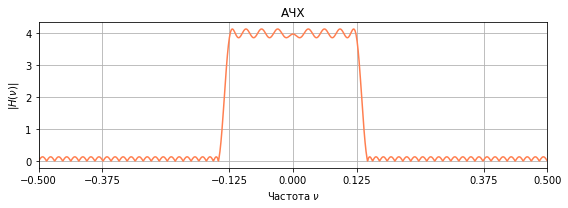

In [11]:
M=1024
plt.figure(figsize=[8, 5], dpi=120)
H1=abs(np.fft.fftshift(np.fft.fft(h_pm, M)))
plt.figure(figsize=[8, 3])
plt.plot(np.arange(M)/M-0.5, H1, color='coral')
plt.grid()
plt.ylabel('$|H(\\nu)|$')
plt.xlabel('Частота $\\nu$')
plt.title('АЧХ')
plt.xlim([-fs/2, fs/2])
plt.xticks([-0.5, -3/(2*L), -1/(2*L), 0, 1/(2*L), 3/(2*L), 0.5])
plt.tight_layout()

In [12]:
y=signal.upfirdn(h_pm, x, up=4)   # FIR filter

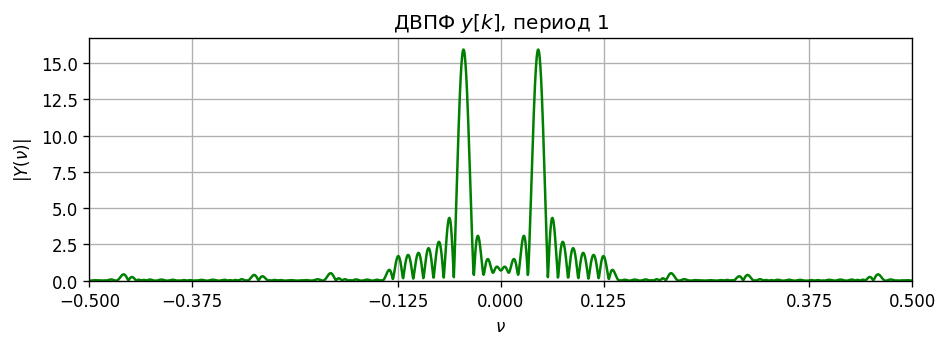

In [13]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 3], dpi=120)
plt.plot(nu, abs(Xn),'g')
plt.axis(xmin=-0.5, xmax=0.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.xlim([-0.5, 0.5])
plt.xticks([-0.5, -3/(2*L), -1/(2*L), 0, 1/(2*L), 3/(2*L), 0.5])
plt.grid()
plt.tight_layout()

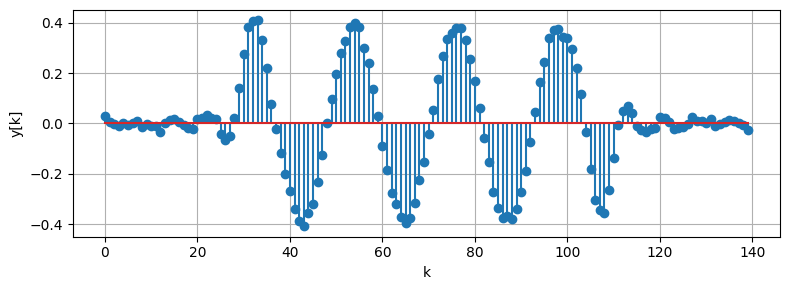

In [14]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

<Figure size 800x300 with 0 Axes>

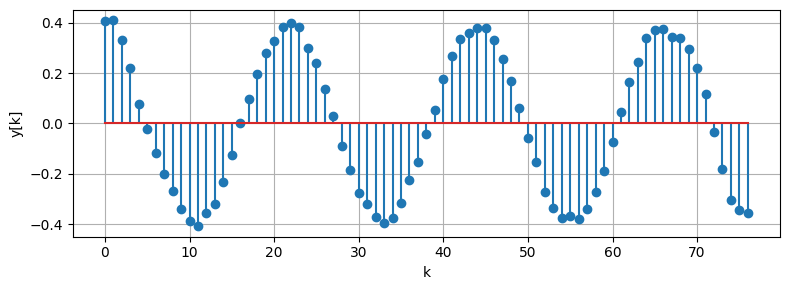

In [15]:
plt.figure(figsize=[8, 3], dpi=100)
y=signal.upfirdn(h_pm, x, up=4)   # FIR filter
y=y[numtaps//2:-(numtaps//2-1)]
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

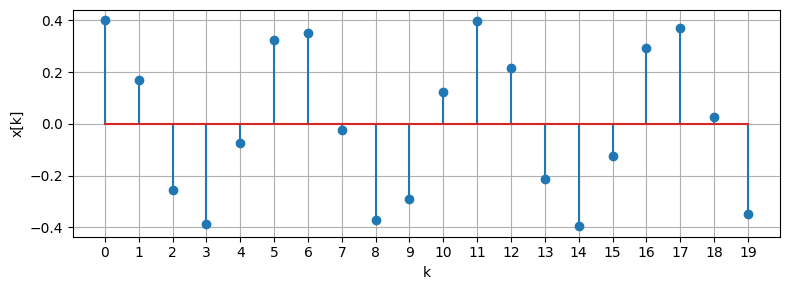

In [16]:
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(x.size), x)
plt.xticks(np.arange(x.size))
plt.xlabel("k")
plt.ylabel('x[k]')
plt.tight_layout()
plt.grid()

### Частный случай: ступенчатая интерполяция

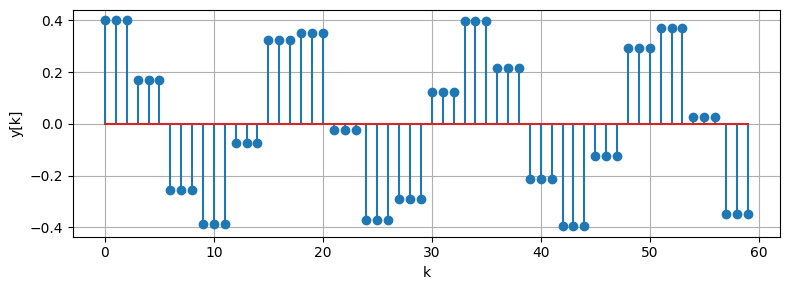

In [17]:
y=signal.upfirdn([1, 1, 1], x, up=3)   # FIR filter
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

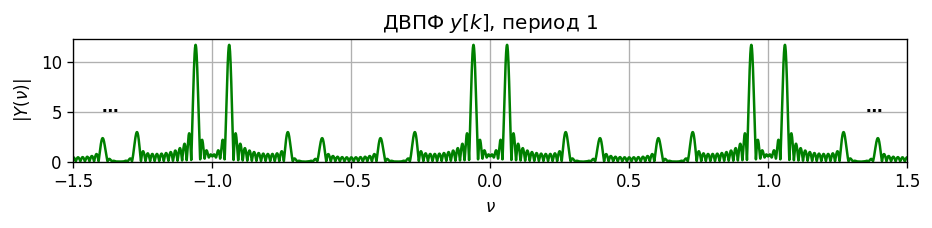

In [18]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 2], dpi=120)
plt.plot(np.hstack((nu-1, nu, nu+1)), 
         np.hstack((abs(Xn), abs(Xn), abs(Xn))), 
         'g')
plt.axis(xmin=-1.5, xmax=1.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.grid()
plt.tight_layout()
plt.show()

### Частный случай:  линейная интерполяция

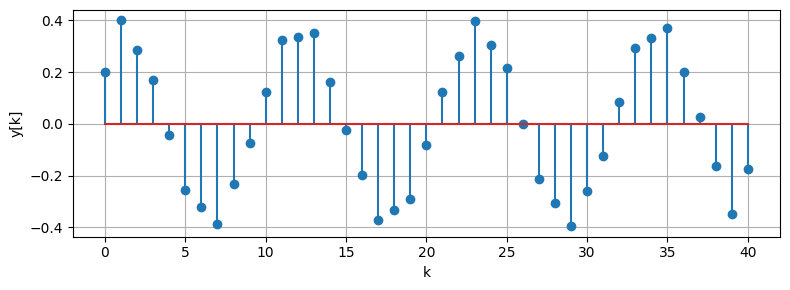

In [19]:
y=signal.upfirdn([0.5, 1, 0.5], x, up=2)   # FIR filter
plt.figure(figsize=[8, 3], dpi=100)
plt.stem(np.arange(y.size), y)
plt.xlabel("k")
plt.ylabel('y[k]')
plt.tight_layout()
plt.grid()

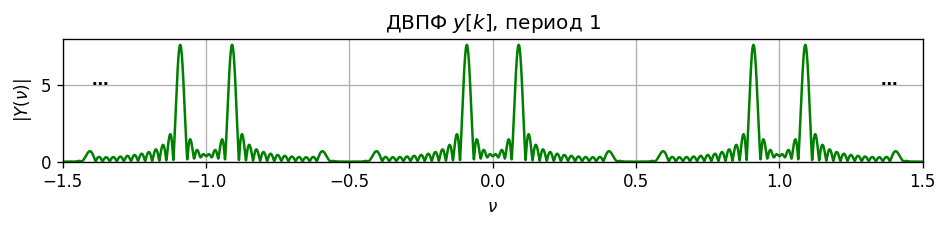

In [20]:
nu, Xn = dtft(y)

plt.figure(figsize=[8, 2], dpi=120)
plt.plot(np.hstack((nu-1, nu, nu+1)), 
         np.hstack((abs(Xn), abs(Xn), abs(Xn))), 
         'g')
plt.axis(xmin=-1.5, xmax=1.5, ymin=0)
plt.title(u'ДВПФ $y[k]$, период 1')
plt.xlabel(u'$\\nu$')
plt.ylabel(u'$|Y(\\nu)|$')
plt.annotate(u"$\mathbf{\dots}$", (-1.4, 5))
plt.annotate(u"$\mathbf{\dots}$", (1.35, 5))
plt.grid()
plt.tight_layout()
plt.show()

# Список литературы

* [1] Солонина А.И. Цифровая обработка сигналов в зеркале Matlab. СПб.: БХВ-Петербург, 2021. 560 c.
* [2] Signal processing (scipy.signal) — SciPy v1.8.0 Manual https://docs.scipy.org/doc/scipy/reference/signal.html
* [3] Романюк Ю.А. Дискретное преобразование Фурье в цифровом спектральном анализе. Уч. пособие. Москва, 2007г.